# Data Exploration 

## CODE Modified by AJF
1/20/2025

Here, we explore our data to gain a baseline understanding of patterns in the data from multiple dimensions.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
variables = ['Black', 'Hispanic', 'White', 'Below Poverty', 
             'Population Density', 'BSA', 
             'NDBI', 'NDVI', 'Spatial Lag', 'UHI']

In [5]:
data = pd.read_csv('data/data.csv', usecols=variables)

## Data Description

| Variable  | Description  |
|---|---|
| Race (Black, Hispanic, White) | The percent of a given race in a census tract.  |
| Below Poverty  | The percent of people living below the federal poverty line in a tract. |
| Population Density  | The density of people in a given area, or the population divided by area.  |
| BSA  | Black-sky albedo describes "the albedo under direct illumination conditions (i.e., the sun as the point source of illumination)". (Alibakhshi et al., 2020) |
| NDBI  | Normalized difference built-up extent provides a measure of built area  |
| NDVI  | Normalized difference vegetation index provides a measure of greenspace  |
| UHI   | The difference between the rural temperature and urban temperature  |
| Spatial Lag  | The average UHI of a census tract's neighbors  |

### Notes on Variables

Normalize Differences in remote sensing = (Band A- Band B)/(Band A+ Band B)
#https://farmonaut.com/remote-sensing/mastering-normalized-difference-indices-from-ndbi-to-ndmi-a-comprehensive-guide-for-remote-sensing-in-agriculture/

**NDVI**
* NDVI measures the normalized difference between near-infrared (NIR) and red light reflectance. 
* Chlorophyll of vegetation absorbs strongly the red wavelength of sunlight (reason we see green) and reflects the near-infrared wavelengths. 
* NDVI ranges from -1 to 1. 
* Values close to +1 = high possibility that it’s dense green leaves (red reflectance is 0, only NIR is left). 
* Values close to 0 =re likely no green leaves and it coule even be an urbanized ar because unhealthy vegetation absorbs less NIR and less sunlight (including red) or said another way red reflectance is high. 
* Values close to -1 = likely it's water- red is completely absorbed.

**NDBI**
* NDBI measures the difference usin NIR and short-wave infrared (SWIR) bands to emphasize manufactured built-up areas
* Also ranges from -1 to 1, with higher values indicating a higher likelihood of built-up areas.
* Positive NDBI values typically indicate built-up areas, while negative values are associated with vegetation and water bodies.

**UHI**

#https://www.climatecentral.org/climate-matters/urban-heat-islands-2023

#https://www.epa.gov/sites/default/files/2014-07/documents/epa_how_to_measure_a_uhi.pdf

* Measured in degrees as difference between urban and rural temperatures

**BSA**

#https://www.umb.edu/spectralmass/modis-user-guide-v006-and-v0061/introduction/
a.

## Descriptive Statistics 
Compute the descriptive statistics of the study variables to see the central tendencies of the data. You can use the [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function in pandas.

In [7]:
data.columns

Index(['BSA', 'NDBI', 'NDVI', 'UHI', 'Black', 'Hispanic', 'White',
       'Below Poverty', 'Spatial Lag', 'Population Density'],
      dtype='object')

In [9]:
data.head(2)

,BSA,NDBI,NDVI,UHI,Black,Hispanic,White,Below Poverty,Spatial Lag,Population Density
0,0.009092,0.070885,-0.048362,2.639005,0.113397,0.013046,0.881053,16.0,3.389006,201.798713
1,0.009004,0.095630,-0.081070,3.474116,0.582440,0.015314,0.384287,19.0,3.313087,586.754546


In [6]:
data.describe()

,BSA,NDBI,NDVI,UHI,Black,Hispanic,White,Below Poverty,Spatial Lag,Population Density
count,70901.000000,70901.000000,70901.000000,70901.000000,70621.000000,70621.000000,70645.000000,70473.000000,70901.000000,70901.000000
mean,-0.009355,0.037703,-0.086914,2.973993,0.152748,0.167208,0.635226,14.196969,2.973993,1922.365205
std,0.025729,0.106575,0.111112,3.769927,0.221758,0.215579,0.299686,11.599504,3.052722,4537.429069
min,-0.187697,-0.448926,-0.631901,-13.252817,0.000000,0.000000,0.000000,0.000000,-11.688669,0.000000
25%,-0.023506,-0.022920,-0.144686,0.492103,0.017503,0.027719,0.424089,6.000000,1.157650,122.962194
50%,-0.004569,0.029844,-0.071591,2.809346,0.057655,0.076064,0.729814,11.000000,3.214812,829.551277
75%,0.006417,0.093470,-0.011971,5.642150,0.180320,0.209385,0.889886,19.000000,5.291268,2012.654084
max,0.116276,0.669509,0.367692,14.823893,1.000000,1.000000,1.000000,100.000000,10.949250,521495.789067


In [53]:
print('All Black')
print(data[data['Black']==1].describe()[['UHI','Below Poverty','NDBI','Population Density']])

print("")
print('All White')
print(data[data['White']==1].describe()[['UHI','Below Poverty','NDBI','Population Density']])


All Black
             UHI  Below Poverty       NDBI  Population Density
count  40.000000      40.000000  40.000000           40.000000
mean    6.311547      39.850000   0.107656         1453.649522
std     2.484409      20.122127   0.104878         1119.209876
min     0.535327       0.000000  -0.107011           11.844887
25%     5.168684      27.750000   0.033822          585.903785
50%     6.933804      39.000000   0.096804         1295.732052
75%     8.002381      50.000000   0.182001         2016.297084
max    10.267652     100.000000   0.308741         4442.396516

All White
             UHI  Below Poverty       NDBI  Population Density
count  97.000000      72.000000  97.000000           97.000000
mean    2.731353      15.291667   0.071240          178.555079
std     3.582870      19.740170   0.108253          579.117428
min    -7.917797       0.000000  -0.149535            0.000000
25%     0.382500       3.000000  -0.010076            0.033713
50%     1.746315       7.000000   

## Histograms 
Create histograms for each variable. I suggest [seaborn](https://seaborn.pydata.org/generated/seaborn.histplot.html).

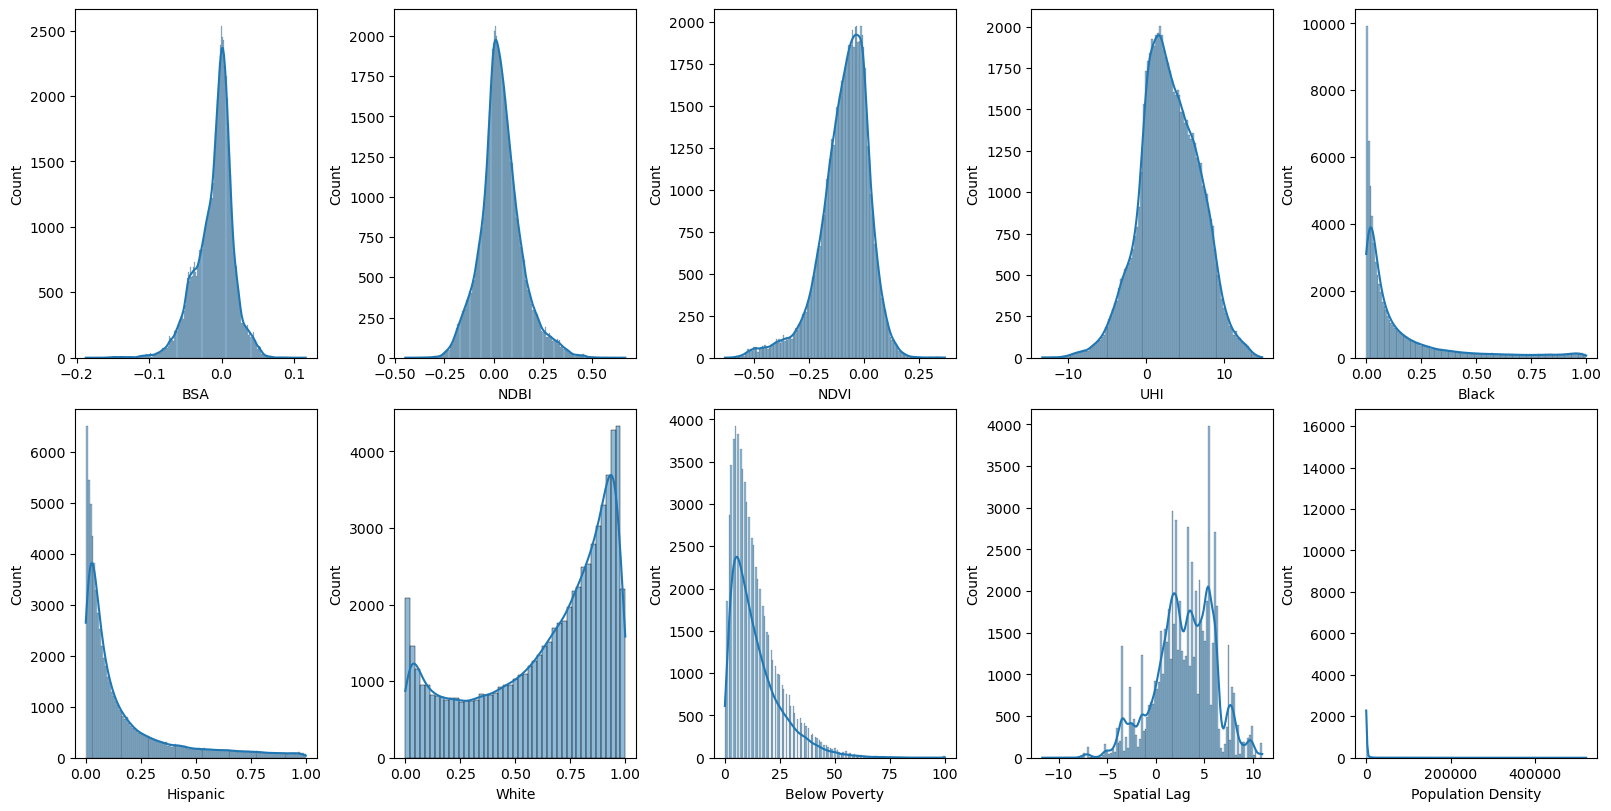

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16,8), constrained_layout=True)

for k, ax in enumerate(axes.flatten()):
    #data.hist()
    sns.histplot(data=data, x=data.columns[k], ax=ax, kde=True)

## Spearman Correlation Analysis
Compute a Spearman correlation analysis of the variables. Here, we align Spearman since our model will be non-parametric.

<Axes: >

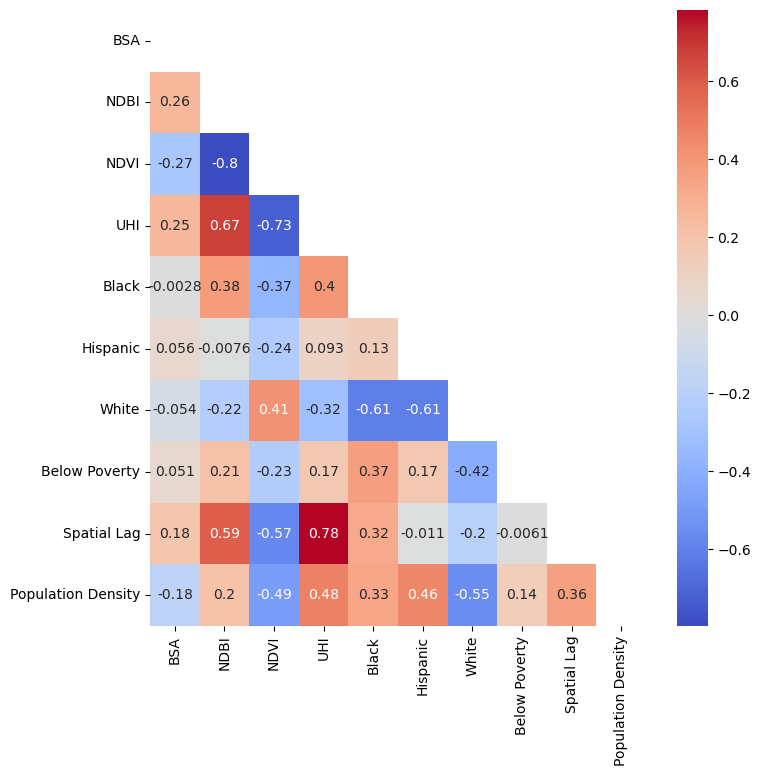

In [21]:
fig,ax = plt.subplots(figsize=(8,8))
corr = data.corr(method='spearman')
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(corr, dtype=bool)))

# Thinkgs to note: Black vs. UHI has corr =0.4 while White vs. UHI = -0.32 (different signs) -- but population density vs. UHI has corr =0.48 -- control for density since Black is corr with pop. density

Text(0.5, 0.9, "Spearman's Rank Correlation Coefficients \n for Study Variables")

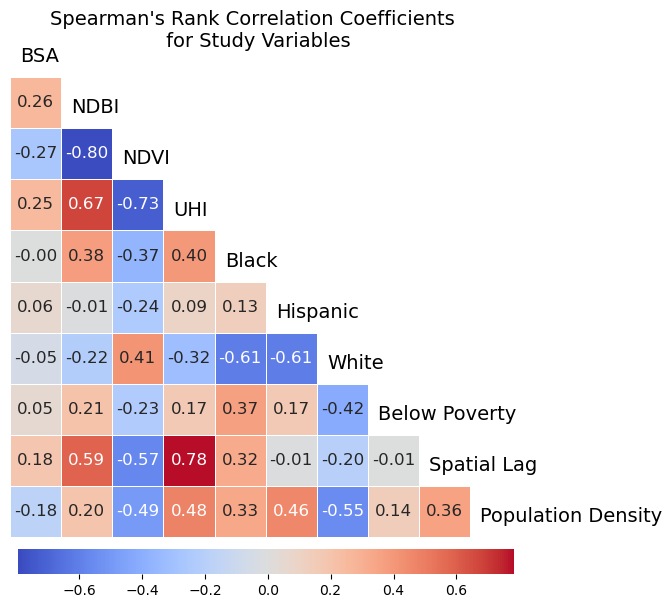

In [17]:
matrix = data.corr(method='spearman')
mask = np.zeros_like(matrix) # creates an array of zeros of size matrix
mask[np.triu_indices_from(mask)] = True # sets the upper right triangle of array mask to 1 or True

fig,ax = plt.subplots(figsize=(8,8))

sns.heatmap(matrix, center = 0, square = True, mask=mask, ax=ax, fmt = ".2f", annot= True, annot_kws={'size': 12},
            linecolor='white', linewidths=0.5, xticklabels=False, cmap='coolwarm',
            cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.02, shrink=0.8));

plt.tick_params(left = False, labelleft=False) 

for i, label in enumerate(data.columns): # labels the columns
    ax.text(i + 0.2, i + 0.6, label, ha='left', va='center', fontsize=14)

plt.suptitle("Spearman's Rank Correlation Coefficients \n for Study Variables", fontsize=14, y=.9)

## Scatter Plots

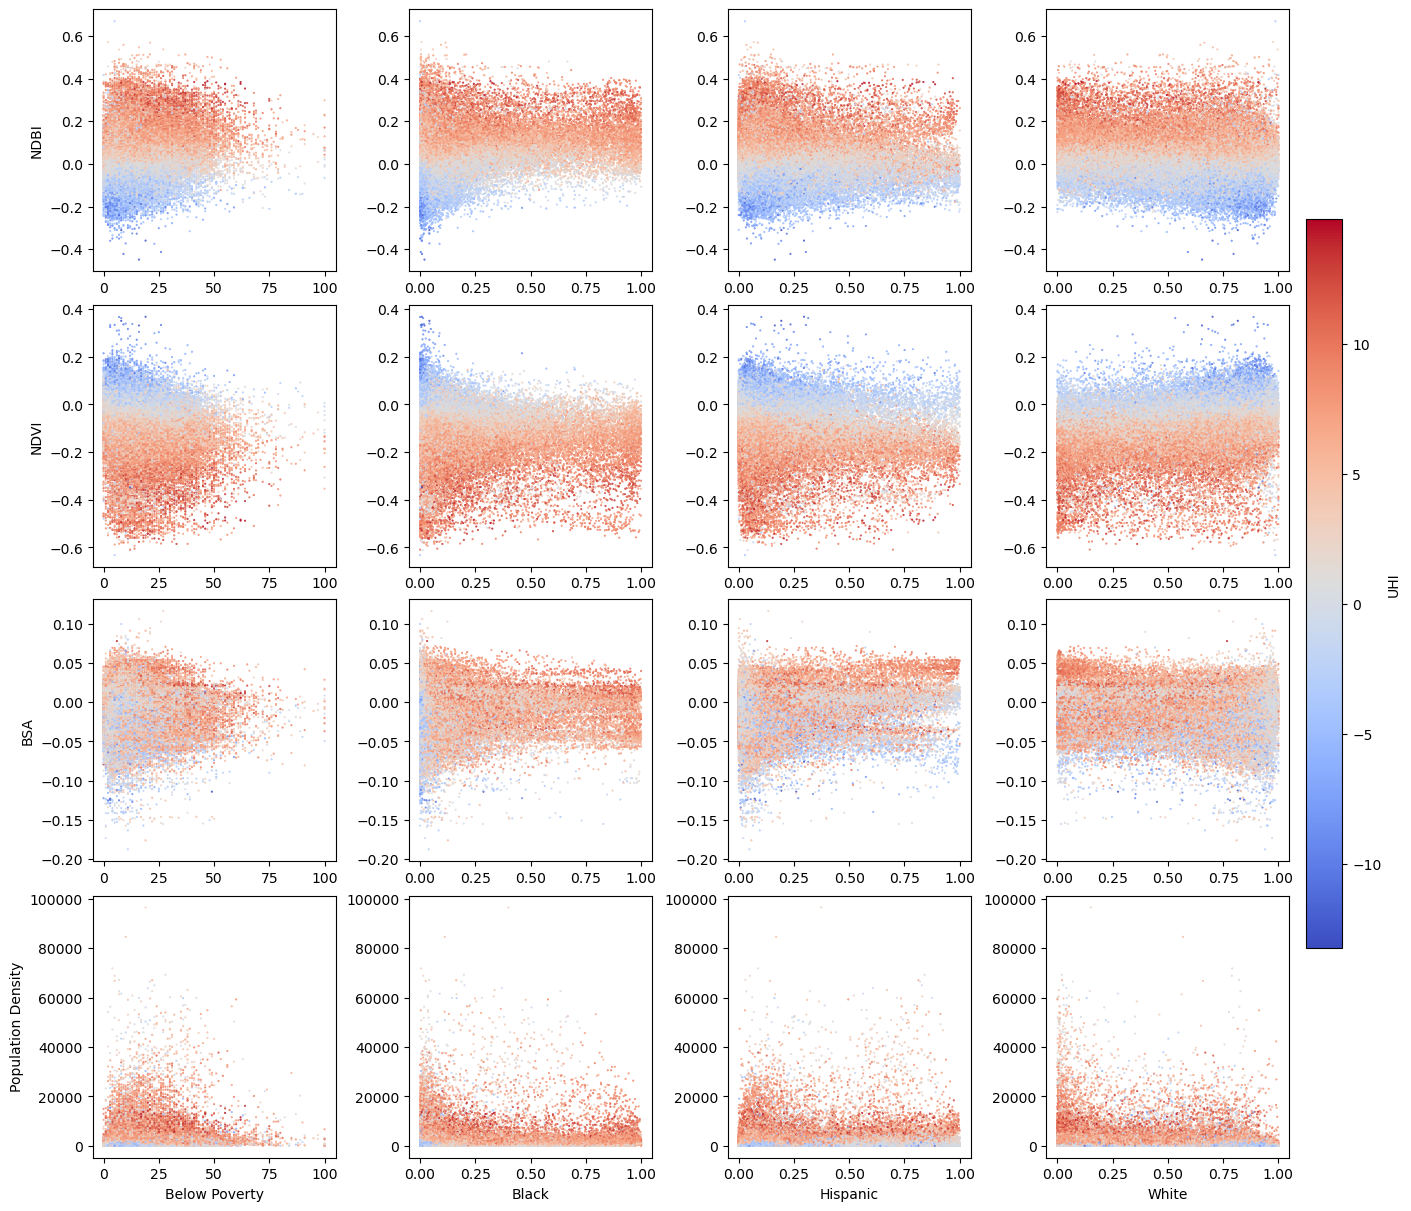

In [63]:
nrows=4
ncols=4
env = ['NDBI', 'NDVI', 'BSA', 'Population Density']
demo = ['Below Poverty', 'Black', 'Hispanic', 'White']

#Note - if use data get same results as Skeleton notebook but dropped outliers to better appreciate pop density
datain = data[data['Population Density']<200000] # records dropped because outliers in pop density*

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14,12), constrained_layout=True)

## YOUR CODE HERE
for i in range(nrows):
    for j in range(ncols):
        ax1 = axes[j,i].scatter(x=datain[demo[i]], y=datain[env[j]], c=datain['UHI'], s=0.25,  cmap='coolwarm')

for a in range(nrows):
    axes[a,0].set_ylabel(env[a])
for b in range(ncols):
    axes[-1,b].set_xlabel(demo[b])
    
fig.colorbar(ax1, ax=axes[:, -1], label='UHI', location='right')

#this takes a while to run because it's a for loop



(1, 10)


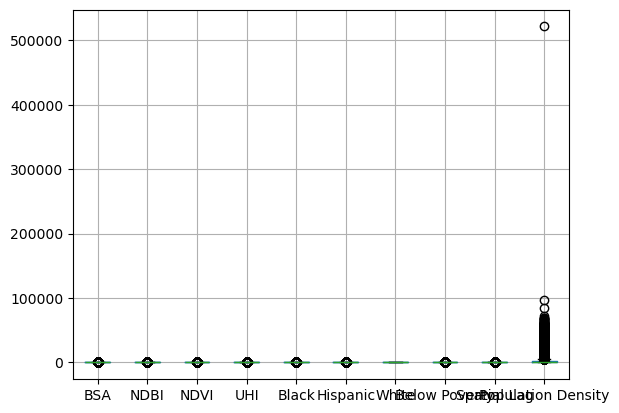

In [62]:
data.boxplot() # shows big outlier for pop density -- drop it

test = data[data['Population Density']>200000]
print(test.shape)

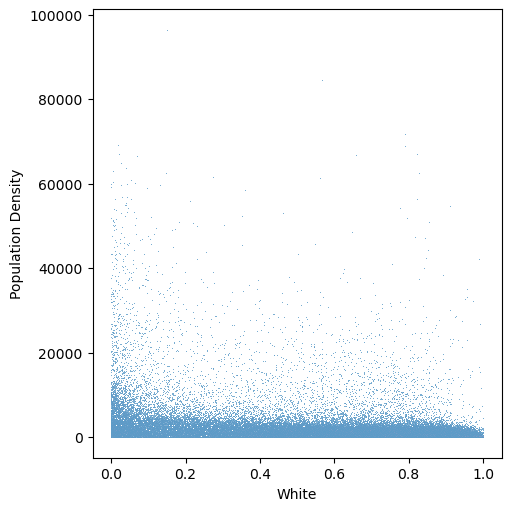

In [106]:
# Scatter plot of UHI vs Population density colored by % White
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5), constrained_layout=True)

var1 = 'UHI'
target = 'Population Density'
var2 = 'White'

norm = plt.Normalize(datain[var1].min(), datain[var1].max())

sns.scatterplot(x=datain['White'], y=datain['Population Density'], s=0.5, ax=ax)


#sns.scatterplot(x=datain[var2], y=datain[target], hue=datain[var1], hue_norm=norm, s=0.5, ax=ax)


# cbar = plt.colorbar(
#     plt.cm.ScalarMappable(cmap="RdBu"),
#     ax=plt.gca()
# )


#sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
#sm.set_array([])

# Remove the legend and add a colorbar
#ax.get_legend().remove()
#ax.figure.colorbar(cbar)



plt.show()